# Real Data KKP

This notebook presents how to compute the fits for all real KKP data and produces the figures and table

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitle as fl
import mplhep
mplhep.style.use(mplhep.style.LHCb2)

In [2]:
def plot_mass_spectrum(Dp_M, model_func, components, log=False):
    fig, ax = plt.subplots()
    x = np.linspace(1840, 2040, 5000)

    if log:
        plt.yscale('log')

    # histogram
    counts, edges = np.histogram(Dp_M, bins=200)
    plt.plot((edges[:-1] + edges[1:])/2, counts, label="Data")

    # main model
    plt.plot(x, model_func(x), label='Fit')

    # components
    for label, val in components.items():
        if isinstance(val, tuple):
            func, style = val
        else:
            func, style = val, {}
        plt.plot(x, func(x), label=label, **style)

    plt.ylabel('Entries per 1 MeV')
    plt.xlabel('$m(K K \pi)$         [MeV]')

    ymax = np.max(model_func(x)) * (2.5 if log else 1.05)
    plt.axis([1840, 2040, 40, ymax])

    plt.legend(bbox_to_anchor=[0.58, 0.5] if log else [0.69, 1])
    plt.text(
        0.05, 0.95, 'LHCb Preliminary',
        ha='left', va='top',
        transform=ax.transAxes,
        size=40
    )

    return fig, ax

In [41]:
Dp_M = np.load('../data/observed/kkp.npy')
Dp_M = Dp_M[Dp_M>1840]
Dp_M = Dp_M[Dp_M<2040]

First, we do a double gaussian fit

In [4]:
mu1 = fl.Param(1869)('mu1')
mu2 = fl.Param(1970)('mu2')

tail = fl.Param.positive(6e4) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1860)
dp = fl.Param.positive(5e5) * fl.gaussian(mu1, sigma=fl.Param.positive(5)) + fl.Param.positive(5e5) * fl.gaussian(mu1, sigma=fl.Param.positive(10))
ds = fl.Param.positive(5e6) * fl.gaussian(mu2, sigma=fl.Param.positive(5)) + fl.Param.positive(5e5) * fl.gaussian(mu2, sigma=fl.Param.positive(10))

model_gaussian = dp+ds+tail

In [5]:
loss = model_gaussian | fl.Cost.chi2(Dp_M, 200)

In [6]:
fl.fit(loss, numba=False).minimizer

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2853                       │        Nfcn = 256, Ngrad = 24        │
│ EDM = 5.91e-07 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.681e6  │  0.020e6  │            │            │  1e-06  │         │       │
│ 1 │ x1   │   5.12    │   0.04    │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.869673e3 │0.000006e3 │            │            │         │         │       │
│ 3 │ x3   │  0.602e6  │  0.020e6  │            │            │  1e-06  │         │       │
│ 4 │ x4   │   7.66    │   0.05    │            │            │  1e-06  │         │       │
│ 5 │ x5   │  1.734e6  │  0.010e6  │            │            │  1e-06  │         │       │
│ 6 │ x6   │   6.175   │   0.014   │            │            │  1e-06  │         │       │
│ 7 │ x7   │1.968575e3 │0.000005e3 │            │            │         │         │       │
│ 8 │ x8   │  0.42e6   │  0.01e6   │            │            │  1e-06  │         │       │
│ 9 │ x9   │   10.68   │   0.06    │            │            │  1e-06  │         │       │
│ 10│ x10  │  57.7e3   │   0.5e3   │            │            │  1e-06  │         │       │
│ 11│ x11  │   95.9    │    1.0    │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     4.14e+08     716.9458    -3.507355       -0.4e9  1.0133398e3       0.01e9      5.79683  -870.126e-3           -0       41.846      -1.59e6     4.9984e3 │
│  x1 │     716.9458      0.00135    -0.005e-3    -712.4412       0.0017       7.6814      0.01e-3    -0.001e-3      -7.2464       0.0001      -2.3332       0.0073 │
│  x2 │    -3.507355    -0.005e-3     3.49e-05     3.345594    -0.013e-3   288.051e-3            0            0  -278.642e-3     0.002e-3    -0.648e-3    -0.459e-3 │
│  x3 │       -0.4e9    -712.4412     3.345594     4.08e+08 -1.0036070e3      -0.01e9     -5.59342   837.804e-3            0      -40.368       1.53e6    -4.8096e3 │
│  x4 │  1.0133398e3       0.0017    -0.013e-3 -1.0036070e3      0.00266      16.1345      0.02e-3    -0.003e-3     -15.2117       0.0001      -4.9910       0.0159 │
│  x5 │       0.01e9       7.6814   288.051e-3      -0.01e9      16.1345     1.04e+08    130.85818    -8.130e-3       -0.1e9      618.631      -1.23e6    -1.5872e3 │
│  x6 │      5.79683      0.01e-3            0     -5.59342      0.02e-3    130.85818     0.000192            0   -130.12752      0.76e-3 

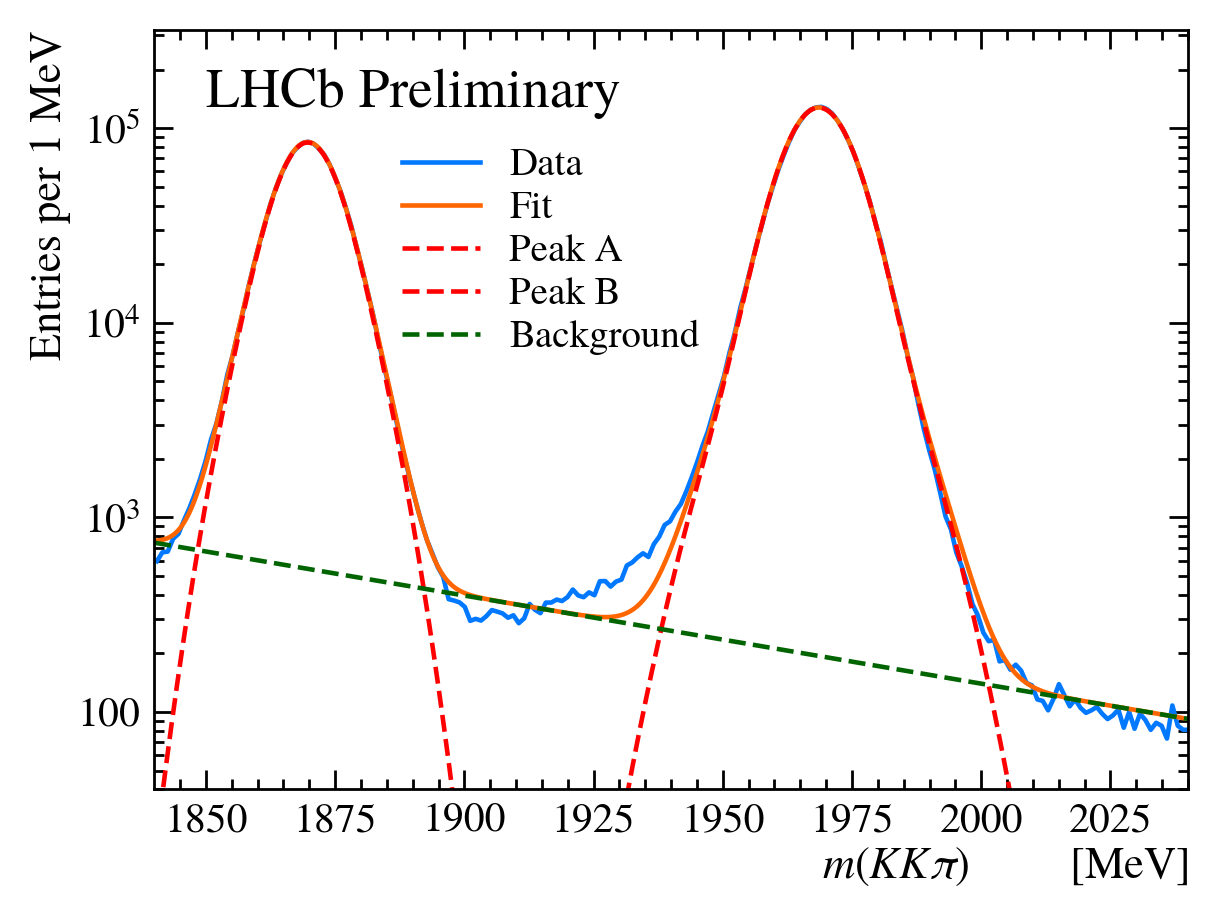

In [7]:
plot_mass_spectrum(Dp_M, model_gaussian, {
    "Peak A": (dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (ds, {"color": "red", "linestyle": "--"}),
    "Background": (tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

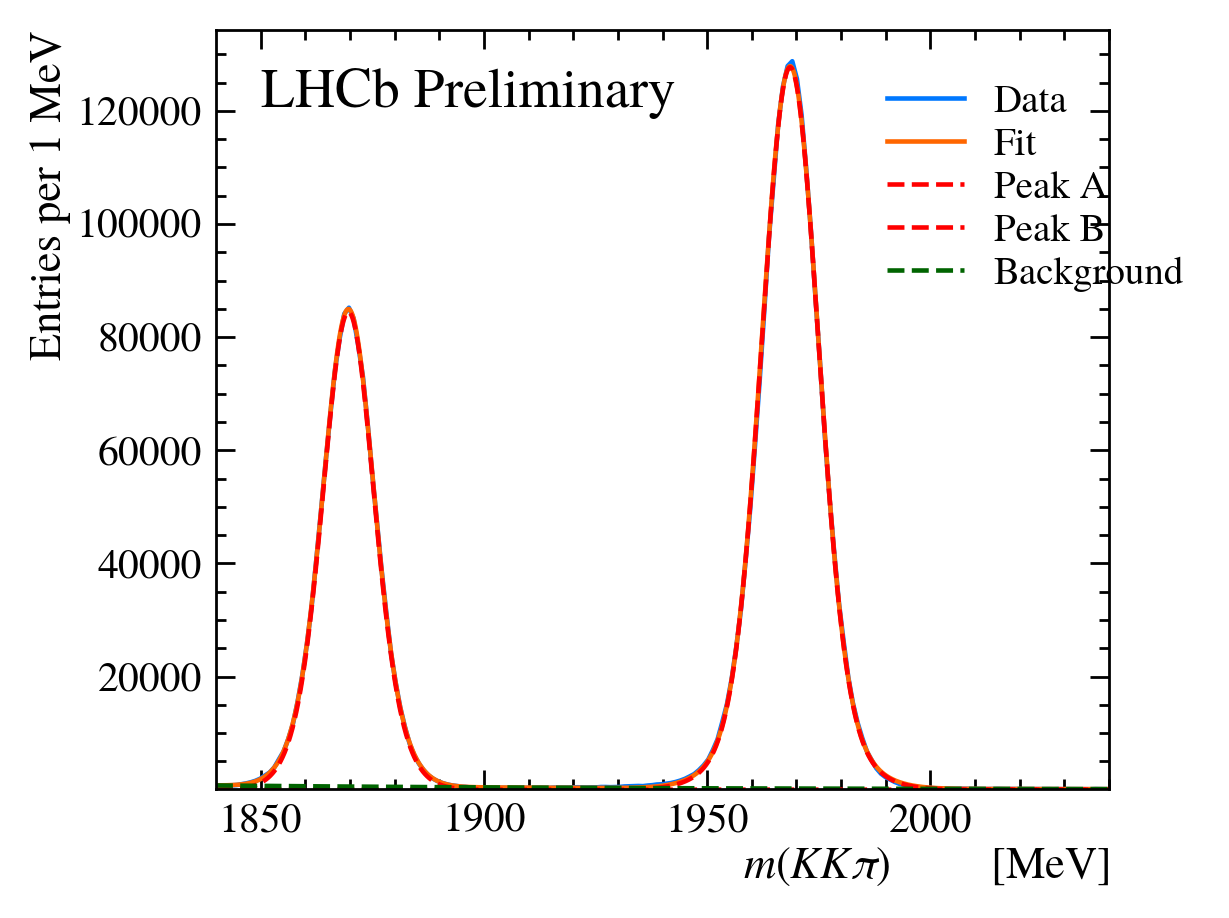

In [8]:
plot_mass_spectrum(Dp_M, model_gaussian, {
    "Peak A": (dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (ds, {"color": "red", "linestyle": "--"}),
    "Background": (tail, {"color": "darkgreen", "linestyle": "--"})
}, log=False); plt.show()

In [9]:
Dp_x, Dp_c = np.load("../data/mc/histograms/Dp.npy")
Ds_x, Ds_c = np.load("../data/mc/histograms/Ds.npy")

Dp_mother_mass = 1869.65
Ds_mother_mass = 1968.33

In [11]:
conv1_mass2 = fl.Param(1970)('mass')
conv1_mass1 = conv1_mass2 - fl.Param(100)('mass_diff')
conv1_Dp = fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv1_mass1, fl.Param.positive(5))+fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv1_mass1, fl.Param.positive(10))
conv1_Ds = fl.Param.positive(600000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv1_mass2, fl.Param.positive(5))+fl.Param.positive(600000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv1_mass2, fl.Param.positive(10))
conv1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1840)
conv1 = conv1_Dp+conv1_Ds+conv1_tail

In [12]:
cost = conv1 | fl.Cost.chi2(Dp_M, 200)

In [13]:
fit_conv1 = fl.fit(conv1 | fl.Cost.chi2(Dp_M, 200))
fit_conv1.minimizer

Compiling model...
Compiling model...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.7                      │        Nfcn = 336, Ngrad = 52        │
│ EDM = 3.4e-05 (Goal: 0.0002)     │           time = 27.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.895e6  │  0.017e6  │            │            │  1e-06  │         │       │
│ 1 │ x1   │   5.398   │   0.028   │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.968699e3 │0.000005e3 │            │            │         │         │       │
│ 3 │ x3   │  98.938   │   0.008   │            │            │         │         │       │
│ 4 │ x4   │  0.406e6  │  0.017e6  │            │            │  1e-06  │         │       │
│ 5 │ x5   │   8.43    │   0.08    │            │            │  1e-06  │         │       │
│ 6 │ x6   │  1.711e6  │  0.014e6  │            │            │  1e-06  │         │       │
│ 7 │ x7   │   6.106   │   0.017   │            │            │  1e-06  │         │       │
│ 8 │ x8   │  0.465e6  │  0.014e6  │            │            │  1e-06  │         │       │
│ 9 │ x9   │   10.07   │   0.07    │            │            │  1e-06  │         │       │
│ 10│ x10  │  59.9e3   │   2.9e3   │            │            │  1e-06  │         │       │
│ 11│ x11  │    360    │    30     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    2.77e+08    440.4758   -1.136719   576.25e-3     -0.27e9  1.215416e3      0.01e9    14.45262     -0.01e9      88.574        15e6     184.3e3 │
│  x1 │    440.4758    0.000759   -0.002e-3           0   -437.1019      1.9e-3     20.2338     0.02e-3    -18.9875      0.1e-3     20.6466    253.9e-3 │
│  x2 │   -1.136719   -0.002e-3    2.46e-05    0.025e-3    1.085038   -0.006e-3 -488.142e-3          -0  454.849e-3   -0.005e-3 -463.559e-3   -5.262e-3 │
│  x3 │   576.25e-3           0    0.025e-3    5.92e-05  -570.11e-3           0  -209.61e-3          -0   214.09e-3          -0   187.58e-3     1.84e-3 │
│  x4 │     -0.27e9   -437.1019    1.085038  -570.11e-3    2.72e+08 -1.201979e3     -0.01e9   -13.86797      0.01e9     -84.985       -14e6    -176.5e3 │
│  x5 │  1.215416e3      1.9e-3   -0.006e-3           0 -1.201979e3     0.00568      80.511     0.08e-3     -75.483       0.000      83.076       1.019 │
│  x6 │      0.01e9     20.2338 -488.142e-3  -209.61e-3     -0.01e9      80.511    1.87e+08   212.70214     -0.18e9     883.101        -0e6      23.6e3 │
│  x7 │    14.45262     0.02e-3          -0          -0   -13.86797     0.08e-3   212.70214 

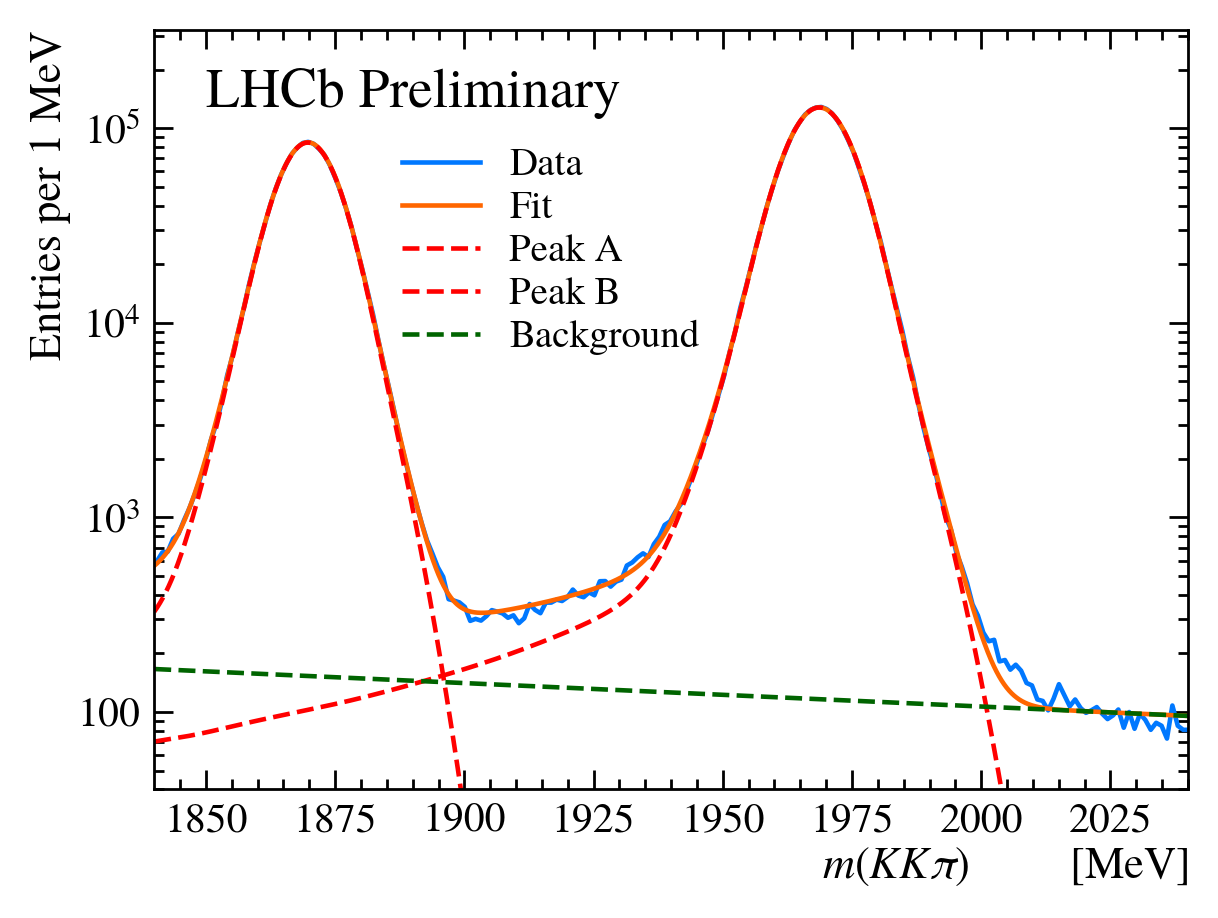

In [14]:
plot_mass_spectrum(Dp_M, conv1, {
    "Peak A": (conv1_Dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (conv1_Ds, {"color": "red", "linestyle": "--"}),
    "Background": (conv1_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

In [15]:
conv2_mass2 = fl.Param(1970)('mass')
conv2_mass1 = conv2_mass2 - fl.Param(100)('mass_diff')
conv2_Dp = fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv2_mass1, fl.Param.positive(5))+fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv2_mass1, fl.Param.positive(10))
conv2_Ds = fl.Param.positive(500000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv2_mass2, fl.Param.positive(5))+fl.Param.positive(500000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv2_mass2, fl.Param.positive(10))
conv2_tail = (fl.Param.positive(40000) *
              fl.exponential(tau=fl.Param(-1)(-2,0) * fl.INPUT + fl.Param(3000)(0,6000)) % (fl.INPUT-1840))
conv2 = conv2_Dp+conv2_Ds+conv2_tail

In [16]:
fit_conv2 = fl.fit(conv2 | fl.Cost.chi2(Dp_M, 200))
fit_conv2.minimizer

Compiling model...
Compiling model...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 459.5                      │        Nfcn = 233, Ngrad = 33        │
│ EDM = 5.5e-06 (Goal: 0.0002)     │           time = 24.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.925e6  │  0.016e6  │            │            │  1e-06  │         │       │
│ 1 │ x1   │   5.439   │   0.027   │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.968698e3 │0.000005e3 │            │            │         │         │       │
│ 3 │ x3   │  98.940   │   0.008   │            │            │         │         │       │
│ 4 │ x4   │  0.377e6  │  0.016e6  │            │            │  1e-06  │         │       │
│ 5 │ x5   │   8.61    │   0.08    │            │            │  1e-06  │         │       │
│ 6 │ x6   │  1.674e6  │  0.015e6  │            │            │  1e-06  │         │       │
│ 7 │ x7   │   6.069   │   0.017   │            │            │  1e-06  │         │       │
│ 8 │ x8   │  0.501e6  │  0.015e6  │            │            │  1e-06  │         │       │
│ 9 │ x9   │   9.86    │   0.07    │            │            │  1e-06  │         │       │
│ 10│ x10  │  55.7e3   │   1.0e3   │            │            │  1e-06  │         │       │
│ 11│ x11  │   -1.72   │   0.11    │            │            │   -2    │    0    │       │
│ 12│ x12  │    459    │    19     │            │            │    0    │  6000   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    2.47e+08    398.6103   -1.667457  -734.61e-3     -0.24e9  1.156428e3           0     2.54162          -0      26.475       0.6e6    -536.055     104.8e3 │
│  x1 │    398.6103    0.000702   -0.003e-3          -0   -395.7829      1.8e-3      4.5521           0     -3.4784           0    933.9e-3     -0.8e-3    149.7e-3 │
│  x2 │   -1.667457   -0.003e-3    2.45e-05    0.025e-3    1.576953   -0.007e-3 -845.727e-3          -0  661.296e-3   -0.007e-3   -0.432e-3    0.022e-3   -4.086e-3 │
│  x3 │  -734.61e-3          -0    0.025e-3    5.89e-05   662.77e-3    -0.01e-3   117.90e-3          -0  -338.28e-3          -0   -16.43e-3     0.02e-3    -3.41e-3 │
│  x4 │     -0.24e9   -395.7829    1.576953   662.77e-3    2.42e+08 -1.145624e3          -0    -2.03089           0     -23.655      -0.5e6     516.547    -101.0e3 │
│  x5 │  1.156428e3      1.8e-3   -0.007e-3    -0.01e-3 -1.145624e3     0.00574      13.026           0      -8.251       0.000       2.634      -0.003       0.584 │
│  x6 │           0      4.5521 -845.727e-3   1

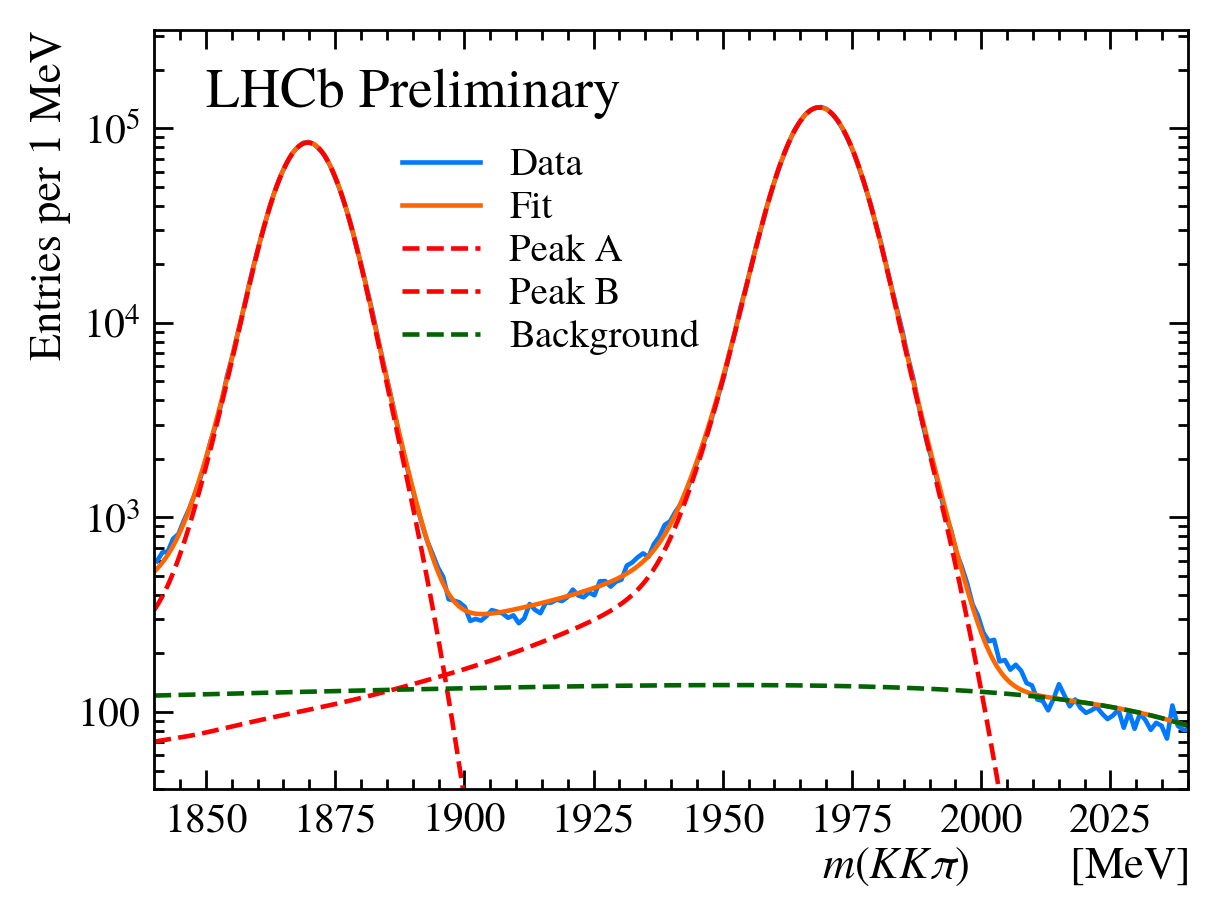

In [17]:
plot_mass_spectrum(Dp_M, conv2, {
    "Peak A": (conv2_Dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (conv2_Ds, {"color": "red", "linestyle": "--"}),
    "Background": (conv2_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

In [18]:
conv3_mass2 = fl.Param(1970)('mass')
conv3_mass1 = conv3_mass2 - fl.Param(100)('mass_diff')
conv3_Dp = (fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv3_mass1, fl.Param.positive(5))
            + fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv3_mass1, fl.Param.positive(6))
            + fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv3_mass1, fl.Param.positive(10)))
conv3_Ds = (fl.Param.positive(500000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv3_mass2, fl.Param.positive(5))
            + fl.Param.positive(500000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv3_mass2, fl.Param.positive(6))
            + fl.Param.positive(500000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv3_mass2, fl.Param.positive(10)))
conv3_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1840)
conv3 = conv3_Dp+conv3_Ds+conv3_tail

In [19]:
fit_conv3 = fl.fit(conv3 | fl.Cost.chi2(Dp_M, 200))
fit_conv3.minimizer

Compiling model...
Compiling model...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 251.1                      │       Nfcn = 821, Ngrad = 107        │
│ EDM = 5.4e-07 (Goal: 0.0002)     │           time = 78.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.74e6   │  0.18e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │    6.3    │    0.5    │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.968698e3 │0.000005e3 │            │            │         │         │       │
│ 3 │ x3   │  98.939   │   0.008   │            │            │         │         │       │
│ 4 │ x4   │  0.37e6   │  0.23e6   │            │            │  1e-06  │         │       │
│ 5 │ x5   │    4.8    │    0.4    │            │            │  1e-06  │         │       │
│ 6 │ x6   │  0.19e6   │  0.06e6   │            │            │  1e-06  │         │       │
│ 7 │ x7   │    9.6    │    0.5    │            │            │  1e-06  │         │       │
│ 8 │ x8   │  0.89e6   │  0.08e6   │            │            │  1e-06  │         │       │
│ 9 │ x9   │   8.20    │   0.22    │            │            │  1e-06  │         │       │
│ 10│ x10  │  1.23e6   │  0.09e6   │            │            │  1e-06  │         │       │
│ 11│ x11  │   5.70    │   0.07    │            │            │  1e-06  │         │       │
│ 12│ x12  │  0.061e6  │  0.015e6  │            │            │  1e-06  │         │       │
│ 13│ x13  │   14.9    │    0.9    │            │            │  1e-06  │         │       │
│ 14│ x14  │   68e3    │    8e3    │            │            │  1e-06  │         │       │
│ 15│ x15  │    520    │    90     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12         x13         x14         x15 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     3.2e+10 -77.55594e3    8.055016    -6.55443   -0.041e12 -63.12284e3         9e9 -61.82865e3         1e9  -2.98713e3        -1e9    -850.116      0.24e9  -15.7231e3     -0.25e9    -3.286e6 │
│  x1 │ -77.55594e3        0.21   -0.033e-3     0.02e-3 104.43714e3        0.16 -26.80065e3        0.19  -3.57311e3        0.01   4.58947e3       0.003     -972.38        0.06   1.04037e3       13.42 │
│  x2 │    8.055016   -0.033e-3    2.46e-05    0.025e-3  -13.933236   -0.019e-3    5.788598   -0.053e-3    4.568369   -0.013e-3   -5.356452   -0.004e-3  727.835e-3   -0.053e-3   -1.658274  -19.870e-3 │
│  x3 │    -6.55443     0.02e-3    0.025e-3    5.92e-05 

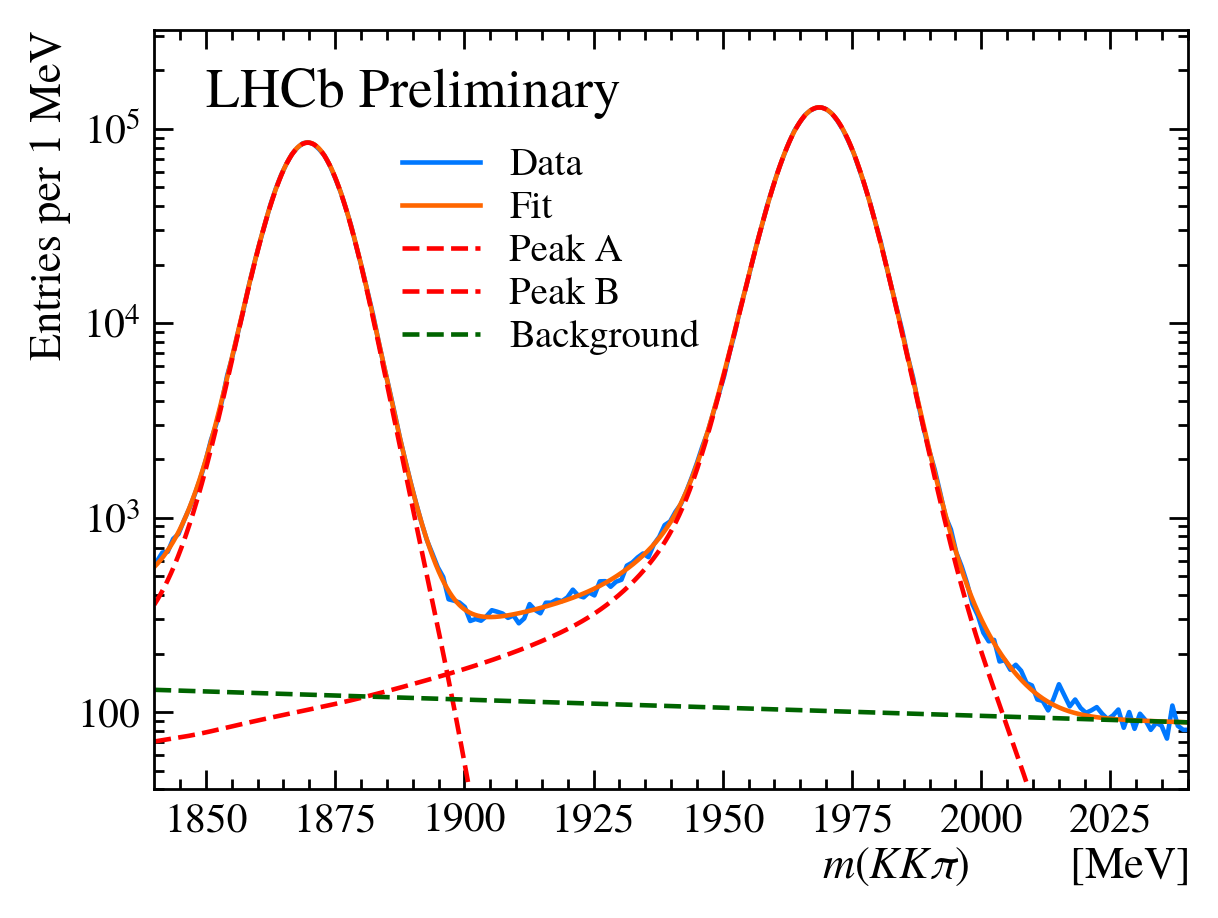

In [20]:
plot_mass_spectrum(Dp_M, conv3, {
    "Peak A": (conv3_Dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (conv3_Ds, {"color": "red", "linestyle": "--"}),
    "Background": (conv3_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

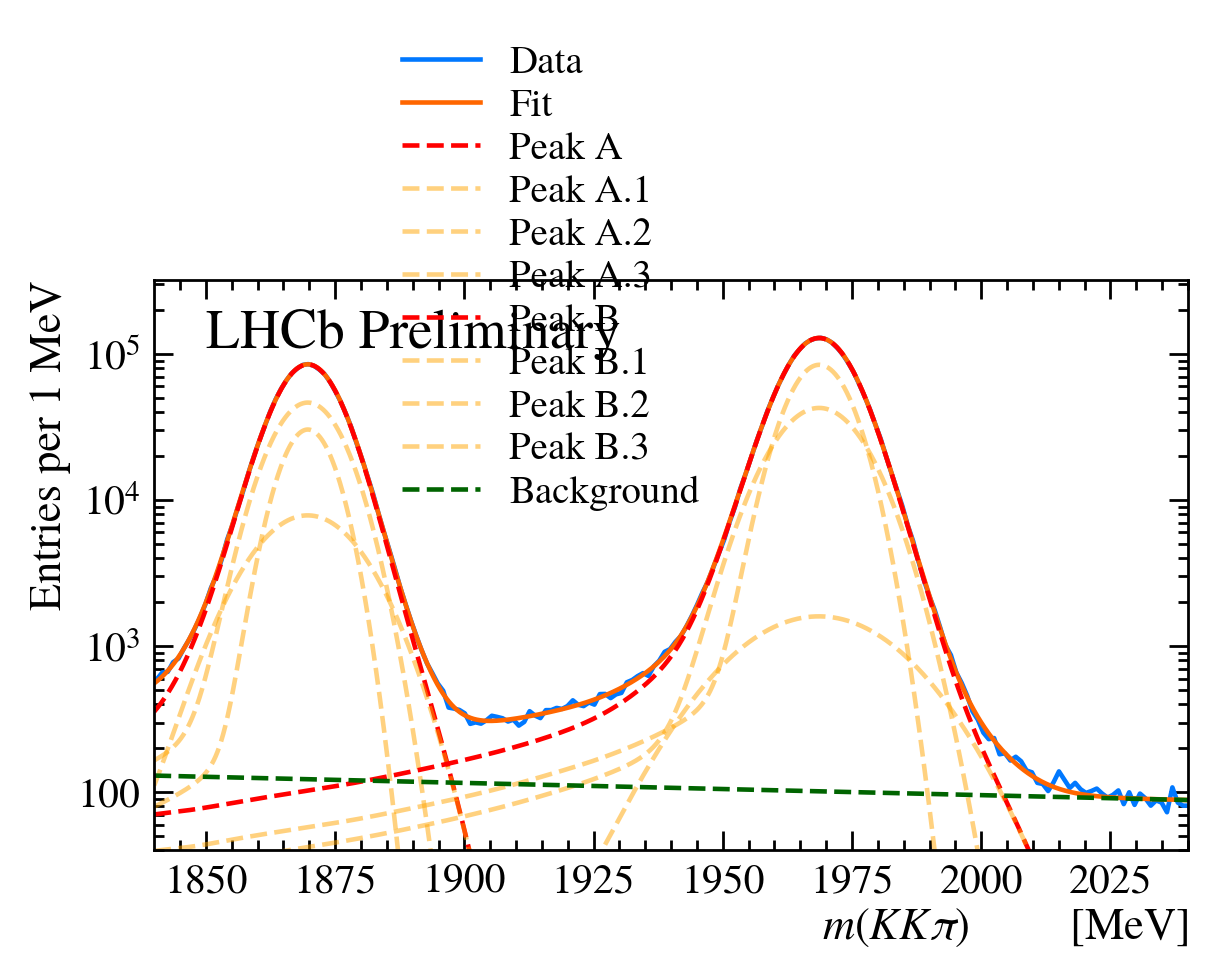

In [21]:
plot_mass_spectrum(Dp_M, conv3, {
    "Peak A": (conv3_Dp, {"color": "red", "linestyle": "--"}),
    "Peak A.1": (conv3_Dp.args[0].args[0], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak A.2": (conv3_Dp.args[0].args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak A.3": (conv3_Dp.args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    
    "Peak B": (conv3_Ds, {"color": "red", "linestyle": "--"}),
    "Peak B.1": (conv3_Ds.args[0].args[0], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak B.2": (conv3_Ds.args[0].args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak B.3": (conv3_Ds.args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    
    "Background": (conv3_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

In [22]:
conv4_mass2 = fl.Param(1970)('mass')
conv4_mass1 = conv4_mass2 - fl.Param(100)('mass_diff')
conv4_Dp = (fl.Param.positive(500000)* fl.convolve(Dp_x,Dp_c,Dp_mother_mass, conv4_mass1, fl.Param.positive(5))
            + fl.Param.positive(500000)* fl.convolve( Dp_x,Dp_c,Dp_mother_mass, conv4_mass1, fl.Param.positive(6))
            + fl.Param.positive(500000)* fl.convolve( Dp_x,Dp_c,Dp_mother_mass, conv4_mass1, fl.Param.positive(10)))
conv4_Ds = (fl.Param.positive(500000)* fl.convolve(Ds_x,Ds_c,Ds_mother_mass, conv4_mass2, fl.Param.positive(5))
            + fl.Param.positive(500000)* fl.convolve( Ds_x,Ds_c,Ds_mother_mass, conv4_mass2, fl.Param.positive(6))
            + fl.Param.positive(500000)* fl.convolve( Ds_x,Ds_c,Ds_mother_mass, conv4_mass2, fl.Param.positive(10)))
conv4_tail = (fl.Param.positive(40000) *
              fl.exponential(tau=fl.Param(-1)(-2,0) * fl.INPUT + fl.Param(3000)(0,6000)) % (fl.INPUT-1840))
conv4 = conv4_Dp+conv4_Ds+conv4_tail

In [23]:
fit_conv4 = fl.fit(conv4 | fl.Cost.chi2(Dp_M, 200))
fit_conv4.minimizer

Compiling model...
Compiling model...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 243.8                      │        Nfcn = 923, Ngrad = 95        │
│ EDM = 8.6e-05 (Goal: 0.0002)     │           time = 79.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.75e6   │  0.15e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │    6.3    │    0.4    │            │            │  1e-06  │         │       │
│ 2 │ x2   │1.968698e3 │0.000005e3 │            │            │         │         │       │
│ 3 │ x3   │  98.940   │   0.008   │            │            │         │         │       │
│ 4 │ x4   │  0.37e6   │  0.19e6   │            │            │  1e-06  │         │       │
│ 5 │ x5   │   4.78    │   0.29    │            │            │  1e-06  │         │       │
│ 6 │ x6   │  0.18e6   │  0.05e6   │            │            │  1e-06  │         │       │
│ 7 │ x7   │    9.7    │    0.4    │            │            │  1e-06  │         │       │
│ 8 │ x8   │  1.02e6   │  0.12e6   │            │            │  1e-06  │         │       │
│ 9 │ x9   │   7.79    │   0.29    │            │            │  1e-06  │         │       │
│ 10│ x10  │  1.05e6   │  0.15e6   │            │            │  1e-06  │         │       │
│ 11│ x11  │   5.57    │   0.12    │            │            │  1e-06  │         │       │
│ 12│ x12  │  0.102e6  │  0.030e6  │            │            │  1e-06  │         │       │
│ 13│ x13  │   13.1    │    0.7    │            │            │  1e-06  │         │       │
│ 14│ x14  │  48.9e3   │   1.4e3   │            │            │  1e-06  │         │       │
│ 15│ x15  │   -1.50   │   0.21    │            │            │   -2    │    0    │       │
│ 16│ x16  │    450    │    31     │            │            │    0    │  6000   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12          x13          x14          x15          x16 │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │      2.2e+10  -51.81983e3     5.269526    765.29e-3    -0.028e12  -43.35842e3        5.6e9  -42.12069e3     0.001e12   -2.18223e3    -0.001e12     -779.494        0.3e9    -7.2094e3        8.9e6    2.12917e3     -509.5e3 │
│  x1 │  -51.81983e3         0.14    -0.025e-3     -0.01e-3   69.17244e3         0.10  -17.30629e3         0.14   -3.03558e3         0.01    4.09085e3        0.003   -1.02662e3         0.03       -30.09        -0.01         2.40 │
│  x2 │     5.269526  

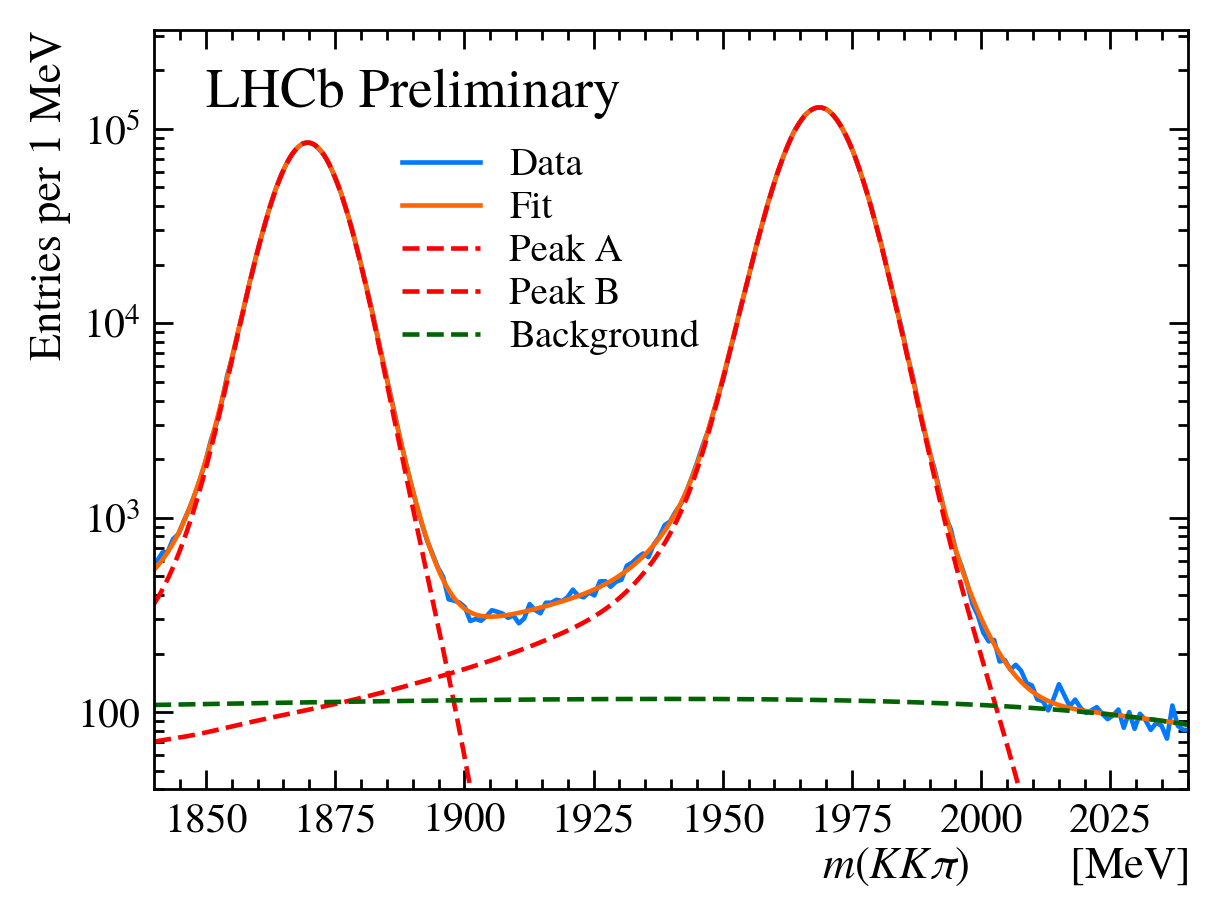

In [24]:
plot_mass_spectrum(Dp_M, conv4, {
    "Peak A": (conv4_Dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (conv4_Ds, {"color": "red", "linestyle": "--"}),
    "Background": (conv4_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

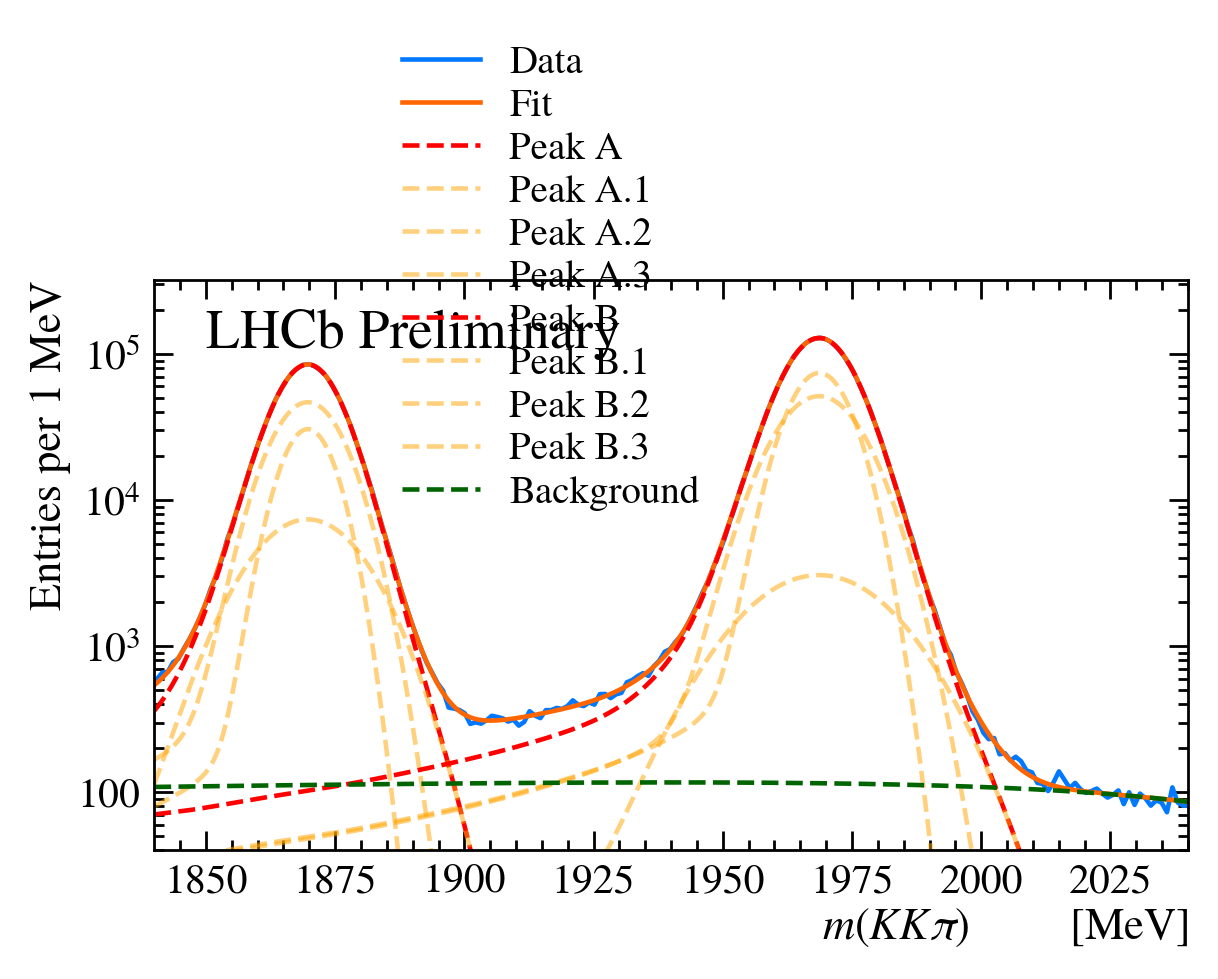

In [25]:
plot_mass_spectrum(Dp_M, conv4, {
    "Peak A": (conv4_Dp, {"color": "red", "linestyle": "--"}),
    "Peak A.1": (conv4_Dp.args[0].args[0], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak A.2": (conv4_Dp.args[0].args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak A.3": (conv4_Dp.args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    
    "Peak B": (conv4_Ds, {"color": "red", "linestyle": "--"}),
    "Peak B.1": (conv4_Ds.args[0].args[0], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak B.2": (conv4_Ds.args[0].args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    "Peak B.3": (conv4_Ds.args[1], {"color": "orange", "linestyle": "--", "alpha": 0.5}),
    
    "Background": (conv4_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

In [42]:
crys1_mass2 = fl.Param(1970)('mass')
crys1_mass1 = crys1_mass2 - fl.Param(100)('mass_diff')
crys1_Dp = (fl.Param.positive(500000)* fl.crystalball(fl.Param(0,5)(3.6), fl.Param(2)(0, np.inf), crys1_mass1, fl.Param.positive(5)('s1')) + 
            fl.Param.positive(700000)* fl.gaussian(crys1_mass1, fl.Param.positive(5)('s2')))
crys1_Ds = (fl.Param.positive(600000)* fl.crystalball(fl.Param(0,5)(1.8), fl.Param(2)(0,np.inf), crys1_mass2, fl.Param.positive(5)('s3')) + 
            fl.Param.positive(1000000)* fl.gaussian(crys1_mass2, fl.Param.positive(5)('s4')))
crys1_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(300)) % (fl.INPUT-1840)
crys1 = crys1_Dp+crys1_Ds+crys1_tail

In [43]:
fit_crys1 = fl.fit(crys1 | fl.Cost.chi2(Dp_M, 200), numba=False, grad=False)
fit_crys1.minimizer

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 713.2                      │             Nfcn = 14008             │
│ EDM = 4.27e-05 (Goal: 0.0002)    │           time = 16.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.494e6  │  0.010e6  │            │            │  1e-06  │         │       │
│ 1 │ x1   │1.968609e3 │0.000005e3 │            │            │         │         │       │
│ 2 │ x2   │  98.942   │   0.008   │            │            │         │         │       │
│ 3 │ x3   │   8.04    │   0.04    │            │            │  1e-06  │         │       │
│ 4 │ x4   │   1.79    │   0.04    │            │            │    0    │    5    │       │
│ 5 │ x5   │    40     │    40     │            │            │    0    │         │       │
│ 6 │ x6   │  0.747e6  │  0.010e6  │            │            │  1e-06  │         │       │
│ 7 │ x7   │   5.27    │   0.02    │            │            │  1e-06  │         │       │
│ 8 │ x8   │  3.25e6   │  0.04e6   │            │            │  1e-06  │         │       │
│ 9 │ x9   │   6.082   │   0.013   │            │            │  1e-06  │         │       │
│ 10│ x10  │   2.665   │   0.006   │            │            │    0    │    5    │       │
│ 11│ x11  │  1.00390  │  0.00009  │            │            │    0    │         │       │
│ 12│ x12  │  0.511e6  │  0.010e6  │            │            │  1e-06  │         │       │
│ 13│ x13  │   9.74    │   0.05    │            │            │  1e-06  │         │       │
│ 14│ x14  │  50.6e3   │   0.9e3   │            │            │  1e-06  │         │       │
│ 15│ x15  │    190    │     9     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │             x0             x1             x2             x3             x4             x5             x6             x7             x8             x9            x10            x11            x12            x13            x14            x15 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │       1.05e+08     -16.972e-3       -1.38170      -351.9506       132.2363        -82.7e3        -0.10e9      -180.1737        -0.01e9       -2.26664        2.12500  -16.757053e-3              0        -8.3212         -0.1e6        -9.59e3 │
│  x1 │     -16.972e-3       2.47e-05       0.025e-3       0.001e-3              0      -2.225e-3      79.249e-3              0       7.405302      -0.002e-3      -0.004e-3          16e-9       1.774025      -0.012e-3     -30.995e-3       1.429e-3 │
│  x2 │       -1.3

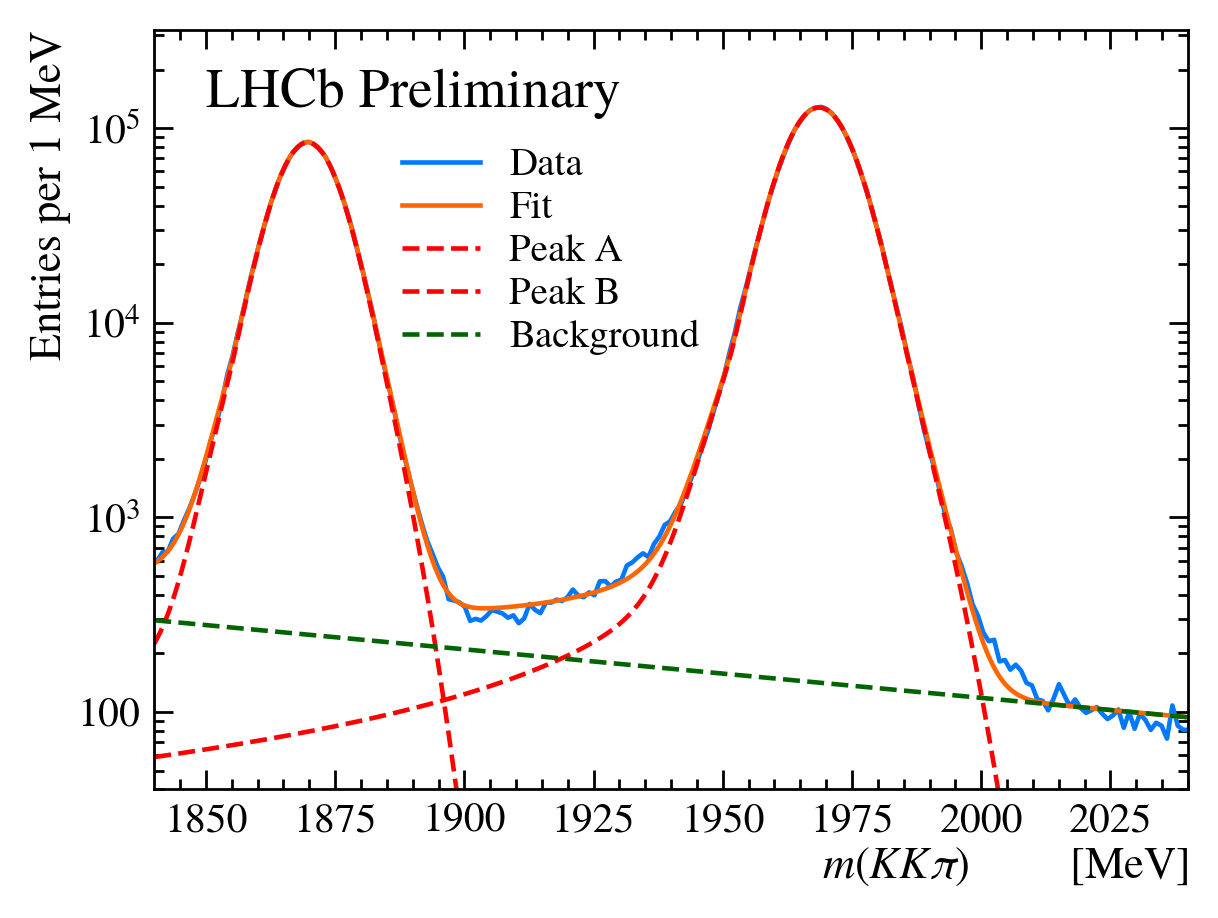

In [29]:
plot_mass_spectrum(Dp_M, crys1, {
    "Peak A": (crys1_Dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (crys1_Ds, {"color": "red", "linestyle": "--"}),
    "Background": (crys1_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

In [30]:
crys2_mass2 = fl.Param(1970)('mass')
crys2_mass1 = crys2_mass2 - fl.Param(100)('mass_diff')
crys2_Dp = (fl.Param.positive(500000)* fl.crystalball(fl.Param(0,5)(4), fl.Param(2), crys2_mass1, fl.Param.positive(5)) + 
            fl.Param.positive(500000)* fl.gaussian(crys2_mass1, fl.Param.positive(5)) +
            fl.Param.positive(500000)* fl.gaussian(crys2_mass1, fl.Param.positive(6)))
crys2_Ds = (fl.Param.positive(500000)* fl.crystalball(fl.Param(0,5)(4), fl.Param(2), crys2_mass2, fl.Param.positive(5)) + 
            fl.Param.positive(500000)* fl.gaussian(crys2_mass2, fl.Param.positive(5)) +
            fl.Param.positive(500000)* fl.gaussian(crys2_mass2, fl.Param.positive(6)))
crys2_tail = fl.Param.positive(40000) * fl.exponential(tau=fl.Param.positive(100)) % (fl.INPUT-1840)
crys2 = crys2_Dp+crys2_Ds+crys2_tail

In [31]:
fit_crys2 = fl.fit(crys2 | fl.Cost.chi2(Dp_M, 200), numba=False, grad=False)
fit_crys2.minimizer

/data/home/twarner/.local/lib/python3.8/site-packages/fitle/model.py:409: RuntimeWarning: invalid value encountered in scalar power
  '__pow__': named(lambda a, b: a ** b, 'pow'),


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 363                        │             Nfcn = 6695              │
│ EDM = 0.000138 (Goal: 0.0002)    │            time = 8.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.35e6   │  0.08e6   │            │            │  1e-06  │         │       │
│ 1 │ x1   │1.968600e3 │0.000005e3 │            │            │         │         │       │
│ 2 │ x2   │  98.915   │   0.009   │            │            │         │         │       │
│ 3 │ x3   │    5.6    │    0.7    │            │            │  1e-06  │         │       │
│ 4 │ x4   │   1.42    │   0.15    │            │            │    0    │    5    │       │
│ 5 │ x5   │   1.014   │   0.004   │            │            │         │         │       │
│ 6 │ x6   │  0.808e6  │  0.012e6  │            │            │  1e-06  │         │       │
│ 7 │ x7   │   5.356   │   0.033   │            │            │  1e-06  │         │       │
│ 8 │ x8   │  0.441e6  │  0.010e6  │            │            │  1e-06  │         │       │
│ 9 │ x9   │   8.25    │   0.04    │            │            │  1e-06  │         │       │
│ 10│ x10  │  1.129e6  │  0.015e6  │            │            │  1e-06  │         │       │
│ 11│ x11  │   7.70    │   0.04    │            │            │  1e-06  │         │       │
│ 12│ x12  │   2.336   │   0.021   │            │            │    0    │    5    │       │
│ 13│ x13  │   1.84    │   0.11    │            │            │         │         │       │
│ 14│ x14  │  0.912e6  │  0.015e6  │            │            │  1e-06  │         │       │
│ 15│ x15  │   5.437   │   0.020   │            │            │  1e-06  │         │       │
│ 16│ x16  │  0.128e6  │  0.011e6  │            │            │  1e-06  │         │       │
│ 17│ x17  │   12.13   │   0.20    │            │            │  1e-06  │         │       │
│ 18│ x18  │  53.5e3   │   0.9e3   │            │            │  1e-06  │         │       │
│ 19│ x19  │    131    │     5     │            │            │  1e-06  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12         x13         x14         x15         x16         x17         x18         x19 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    6.95e+09   -3.709031   -23.89911    1.3718e3    -728.249 -291.259229      0.02e9    -42.1680     -0.01e9     -5.2011     -0.02e9    -92.6246   

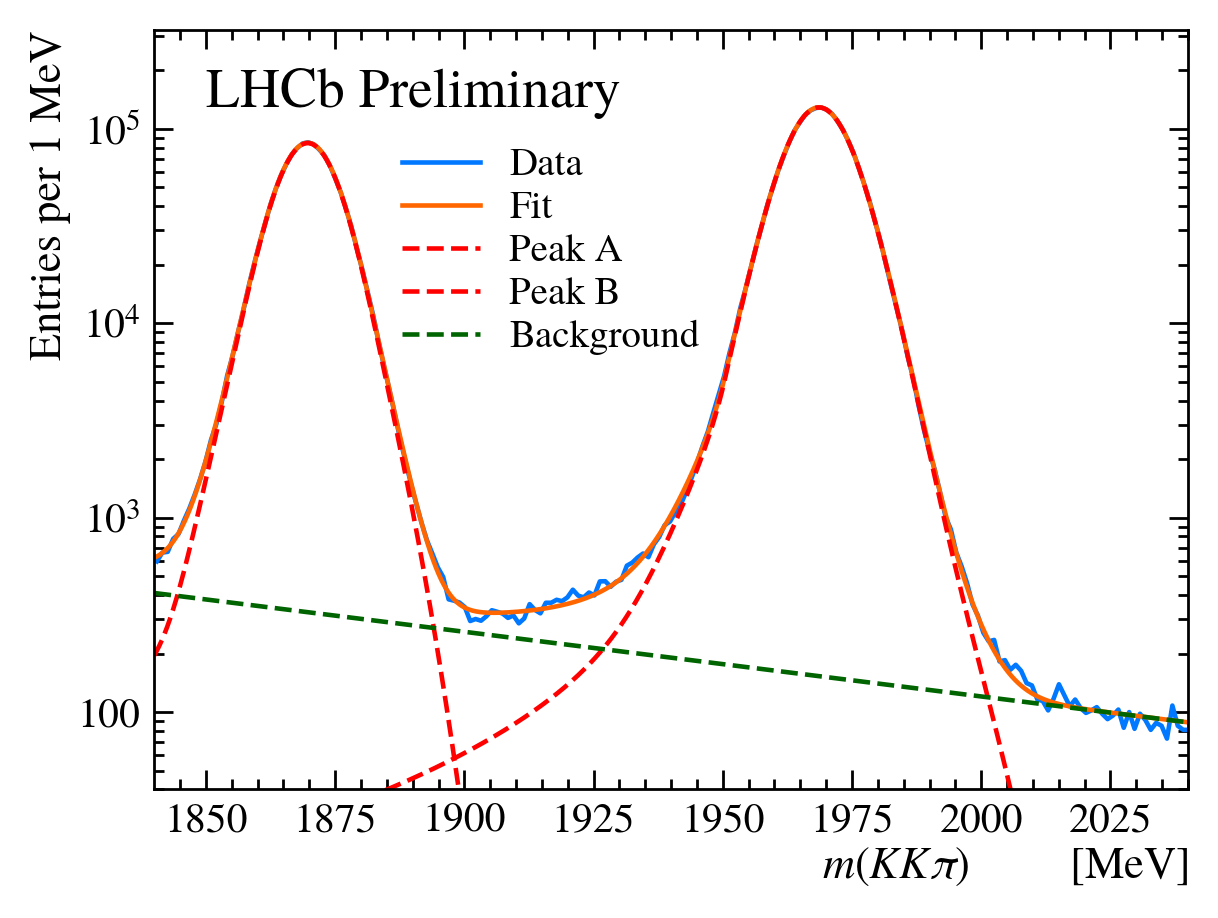

In [32]:
plot_mass_spectrum(Dp_M, crys2, {
    "Peak A": (crys2_Dp, {"color": "red", "linestyle": "--"}),
    "Peak B": (crys2_Ds, {"color": "red", "linestyle": "--"}),
    "Background": (crys2_tail, {"color": "darkgreen", "linestyle": "--"})
}, log=True); plt.show()

In [33]:
fits = [fit_conv1, fit_conv2, fit_conv3, fit_conv4, fit_crys1, fit_crys2]
for fit in fits:
    print(f" & {len(fit.values)} & {fit.values['mass']:.3f} ± {fit.errors['mass']:.3f} & {fit.values['mass_diff']:.3f} ± {fit.errors['mass_diff']:.3f} & {fit.fval/(200 - len(fit.values)):.1f} \\\\")

 & 12 & 1968.699 ± 0.005 & 98.938 ± 0.008 & 2.8 \\
 & 13 & 1968.698 ± 0.005 & 98.940 ± 0.008 & 2.5 \\
 & 16 & 1968.698 ± 0.005 & 98.939 ± 0.008 & 1.4 \\
 & 17 & 1968.698 ± 0.005 & 98.940 ± 0.008 & 1.3 \\
 & 16 & 1968.608 ± 0.005 & 98.934 ± 0.008 & 3.8 \\
 & 20 & 1968.600 ± 0.005 & 98.915 ± 0.009 & 2.0 \\
